In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


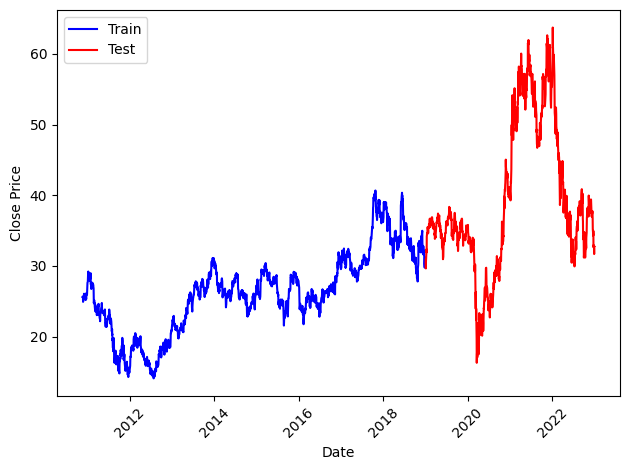

In [8]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]
num_runs = 5
all_records = []

for strategy in evolve_strategy:
    if strategy == 'gga':
        num_islands = 1
        pop_size = 20
    else:
        num_islands = 10
        pop_size = 20

    for run in range(num_runs):
        ga = IslandGGA(
            data=data.train_data,
            K=4,
            num_islands=num_islands,
            m_iter=5,
            num_iter=10,
            pSize=pop_size,
            r_cross=0.1,
            r_mut=0.1,
            strategies=data.strategies,
            evolve_strategy=strategy
        )
        ga.evolve()
        convergence = ga.convergence_times  # assume it's a list of values over time

        for t, val in enumerate(convergence, start=1):
            all_records.append({
                'strategy': strategy,
                'run': run,
                'iteration': t,
                'value': val
            })

# Convert to DataFrame
df_convergence = pd.DataFrame(all_records)

# Save for inspection
df_convergence.to_csv("convergence_all_runs.csv", index=False)


Running ring
Generation 1: Best fitness = 6.398718618243451  Average Fitness = 2.250582364673319
Generation 2: Best fitness = 6.398718618243451  Average Fitness = 2.99459702282168
Generation 3: Best fitness = 6.398718618243451  Average Fitness = 4.064868455846876
Generation 4: Best fitness = 6.478392681981207  Average Fitness = 4.343649668221874
Generation 5: Best fitness = 6.827379781453261  Average Fitness = 4.5704554286526395
Island 0 Migration -Left island 9 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -Right island 3
Island 3 Migration -Left island 2 -Right island 4
Island 4 Migration -Left island 3 -Right island 5
Island 5 Migration -Left island 4 -Right island 6
Island 6 Migration -Left island 5 -Right island 7
Island 7 Migration -Left island 6 -Right island 8
Island 8 Migration -Left island 7 -Right island 9
Island 9 Migration -Left island 8 -Right island 0
Generation 6: Best fitness = 7.311496984133616  Average Fitness = 5

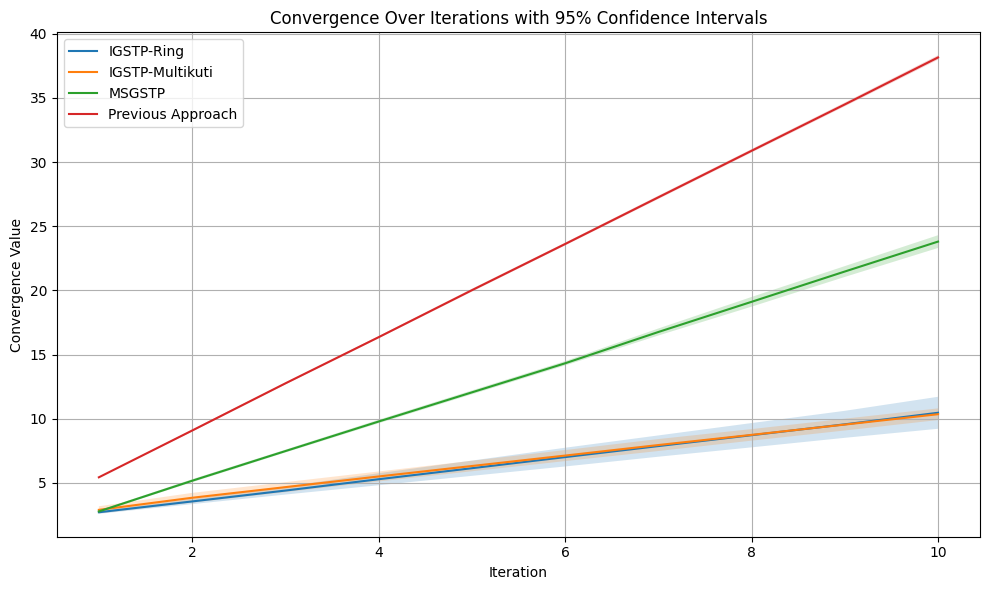

In [16]:
# Group by strategy and time step
summary = df_convergence.groupby(['strategy', 'iteration'])['value'].agg(['mean', 'std', 'count']).reset_index()
summary['ci95'] = 1.96 * summary['std'] / summary['count']**0.5

# Plot
# Custom label mapping
strategy_labels = {
    'gga': "Previous Approach",
    'ring': "IGSTP-Ring",
    'multikuti': "IGSTP-Multikuti",
    'master_slave': "MSGSTP"
}

# Plot
plt.figure(figsize=(10, 6))
for strategy in evolve_strategy:
    sub = summary[summary['strategy'] == strategy]
    label = strategy_labels.get(strategy, strategy)
    plt.plot(sub['iteration'], sub['mean'], label=label)
    plt.fill_between(sub['iteration'], sub['mean'] - sub['ci95'], sub['mean'] + sub['ci95'], alpha=0.2)

plt.xlabel('Iteration')
plt.ylabel('Convergence Value')
plt.title('Convergence Over Iterations with 95% Confidence Intervals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



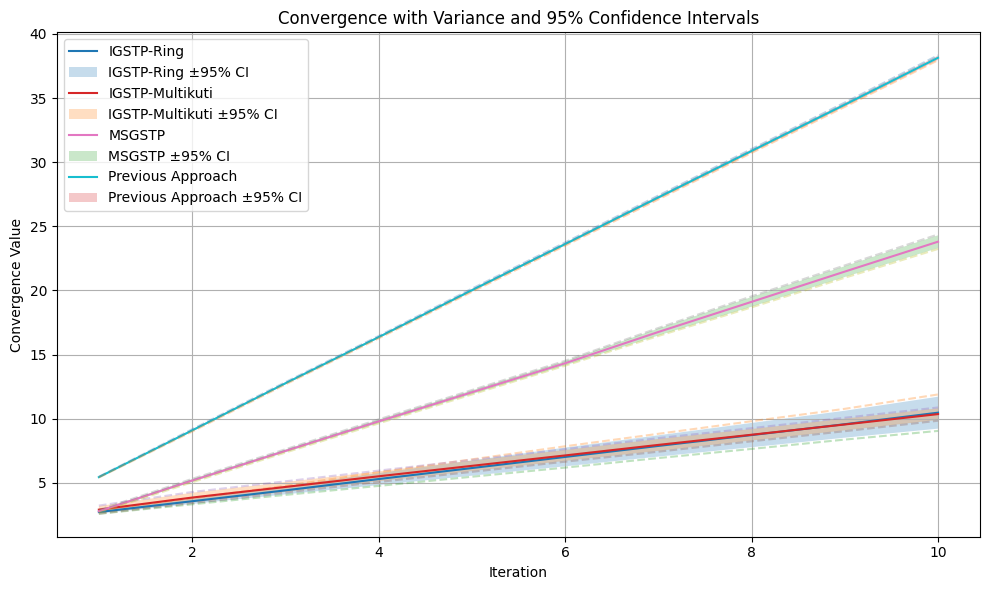

In [17]:
plt.figure(figsize=(10, 6))

for strategy in evolve_strategy:
    sub = summary[summary['strategy'] == strategy]
    label = strategy_labels.get(strategy, strategy)

    mean = sub['mean']
    ci95 = sub['ci95']
    std = sub['std']
    x = sub['iteration']

    # Plot mean
    plt.plot(x, mean, label=label)

    # Confidence Interval (shaded)
    plt.fill_between(x, mean - ci95, mean + ci95, alpha=0.25, label=f"{label} ±95% CI")

    # Std Dev (dashed lines)
    plt.plot(x, mean + std, linestyle='--', alpha=0.3)
    plt.plot(x, mean - std, linestyle='--', alpha=0.3)

plt.xlabel("Iteration")
plt.ylabel("Convergence Value")
plt.title("Convergence with Variance and 95% Confidence Intervals")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
file_name = 'convergence_values'
convergence_values = np.load(file_name + '.npy', allow_pickle=True)
evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]

In [7]:
convergence_values = [list(map(float, values)) for values in convergence_values]
convergence_values

[[2.3429491593786516,
  3.5713595388797748,
  4.47164897766352,
  5.0748180814491,
  5.6003071086328955,
  5.997576003653509,
  6.476656535308599,
  6.682426804881099,
  6.996731353676897,
  7.157594897965022,
  7.247506622793432,
  7.503099288587263,
  7.698362647369303,
  7.7193436260769985,
  7.880945705637288,
  7.9800599390181,
  8.202546112785315,
  8.412654122268297,
  8.513938795080808,
  8.605327023842365,
  8.511980381919686,
  8.73504184496566,
  8.990168225707091,
  8.977714694914019,
  9.054982590205054,
  9.151482464854466,
  9.341551806456911,
  9.49357205163011,
  9.48303223201906,
  9.52005967877588,
  9.676728514553654,
  9.741411649831793,
  9.810671894435142,
  9.880896711120508,
  10.032573693772392,
  10.149340993367526,
  10.175997366589607,
  10.231234311529139,
  10.257065095311171,
  10.389417520253826,
  10.32761103283515,
  10.491959272408511,
  10.58011025804774,
  10.543894696009385,
  10.578516583653743,
  10.621280679148022,
  10.76116785553145,
  10.761

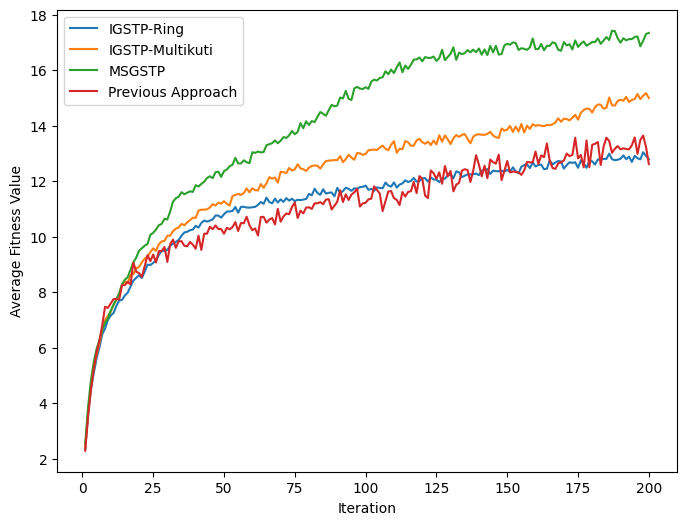

In [5]:
# Plot the convergence values for each evolutionary strategy


plt.figure(figsize=(8, 6))
for i in range(len(evolve_strategy)):
    if evolve_strategy[i] =='gga':
        l = "Previous Approach"
    elif evolve_strategy[i] == 'ring':
        l = "IGSTP-Ring"
    elif evolve_strategy[i] == "multikuti": 
        l = "IGSTP-Multikuti"
    elif evolve_strategy[i] == "master_slave":
        l = "MSGSTP"
    plt.plot(np.arange(1, 201), convergence_values[i], label=l)
plt.xlabel('Iteration')
plt.ylabel('Average Fitness Value')
#plt.title('Convergence Over Time for Proposed Methods')
plt.legend()
plt.show()

In [5]:
ga.globalBest.weights
print(ga.globalBest.wb)

0
